Dans le monde réel on trouve des phénomènes dus au "hasard", on dit des phénomènes aléatoires. Il peut être utile, parfois numériquement, de pouvoir modéliser et simuler ces phénomènes.

La simulation d'expériences aléatoires en Python peut être réalisée à l'aide du module $numpy.random$, qui offre des outils puissants pour générer des nombres aléatoires, tirer des échantillons aléatoires, et plus encore.

***Exemple : Lancer d'un dé***

Le lancer d'un dé à six faces peut être vu comme un tirage aléatoire d'un nombre dans {1,2,3,4,5,6}.

En Python on peut simuler cette expérience aléatoire en utilisant le module $random$ de la bibliothèque $numpy$ permettant de générer des nombres aléatoires.

La fonction $randint(n1, n2)$ renvoie un entier aléatoire de la distribution uniforme des entiers de $n1$ (inclus) à $n2$ (exclus).

In [3]:
import numpy as np

# Lancer un dé
x = np.random.randint(1, 7)
print(f"Résultat du lancer de dé : {x}")

Résultat du lancer de dé : 2


Pour simuler 10 lancers d'un dé et afficher le résultat chaque fois :

In [4]:
for i in range(1, 11):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 1 : 2
Lancer numéro 2 : 5
Lancer numéro 3 : 3
Lancer numéro 4 : 4
Lancer numéro 5 : 4
Lancer numéro 6 : 3
Lancer numéro 7 : 2
Lancer numéro 8 : 6
Lancer numéro 9 : 3
Lancer numéro 10 : 2


***Initialisation du générateur***

La fonction $seed(x)$ permet d'initialiser par $x$ le générateur de nombres aléatoires. Si $x$ est omis, l'heure système actuelle est utilisée. Cette fonction est utilisée pour répéter des expériences aléatoires avec les mêmes résultats.

***Exemple***

In [5]:
# 5 lancers d'un dé :
for i in range(5):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 0 : 3
Lancer numéro 1 : 6
Lancer numéro 2 : 4
Lancer numéro 3 : 2
Lancer numéro 4 : 2


In [6]:
# En répétant la simulation on aura des valeurs différentes :

for i in range(5):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 0 : 2
Lancer numéro 1 : 3
Lancer numéro 2 : 2
Lancer numéro 3 : 1
Lancer numéro 4 : 1


In [7]:
# Maintenant, on initialise le générateur par une valeur en utilisant seed(valeur) :

np.random.seed(1)
for i in range(5):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 0 : 6
Lancer numéro 1 : 4
Lancer numéro 2 : 5
Lancer numéro 3 : 1
Lancer numéro 4 : 2


In [8]:
# On aura les mêmes résultas précédents en utilisant la même valeur :

np.random.seed(1)
for i in range(5):
    x = np.random.randint(1, 7)
    print(f"Lancer numéro {i} : {x}")

Lancer numéro 0 : 6
Lancer numéro 1 : 4
Lancer numéro 2 : 5
Lancer numéro 3 : 1
Lancer numéro 4 : 2


# Simulation de variables aléatoires discrètes 

## En utilisant la méthode d’inversion de la fonction de répartition  

C'est une technique utilisée pour simuler des réalisations d’une variable aléatoire discrète $X$ suivant une loi donnée en utilisant une variable aléatoire $U$ qui suit la loi uniforme sur $[0,1]$.

### Principe

- Soit une variable aléatoire discrète  $X$  prenant des valeurs $x_1, x_2, \dots, x_n$ avec des probabilités associées $P(X = x_i) = p_i$, où $\sum_{i=1}^n p_i = 1$.

- Construire la fonction de répartition cumulative $F$ associée à $X$ :

$$F_X(x_i) = P(X \leq x_i) = \sum P(X = x), \text{ tels que } x \leq x_i.$$

- Générer un nombre aléatoire $U$ entre 0 et 1.

- Alors $X$ est le plus petit $x_i$ tel que : $U \leq F_X(x_i)$.


### Représentations graphiques

Pour juger de la pertinence des simulations, on peut utiliser des représentations graphiques. Pour cela, on procèdera comme suit :

- On crée un échantillon, c’est-à-dire une liste contenant plusieurs réalisations de la fonction Loi.
- On compare graphiquement les fréquences obtenues avec les probabilités théoriques.

Dans le cas de simulation de variables aléatoires discrètes, on va comparer le diagramme en bâtons des probabilités théoriques et le diagramme en bâtons des fréquences pour $x \in X(\Omega)$.

Pour un nombre de simulations suffisamment grand, les deux diagrammes doivent être proches.

### Simulation de la loi de Bernoulli

Une expérience de $Bernoulli$ est une expérience aléatoire qui peut aboutir à deux résultats possibles :

- Succès (1) avec une probabilité $p$
- Échec (0) avec une probabilité $1 - p$

Si $X$ est une variable aléatoire suivant une loi de Bernoulli de paramètre $p$, on note $X\sim\mathcal{B}(p)$, et la fonction de masse de probabilité est donnée par :

$$P(X = 1) = p \> et \> P(X = 0) = 1-p$$

avec une espérance 

$$\mathbb{E}[X] = \sum_{x \in X(\Omega)} x P(X = x) = p$$

Pour simuler une loi de Bernoulli, on procèdera comme évoqué plus haut : On fait appel à la fonction $random()$ qui renvoie un nombre aléatoire dans $[0, 1[$ et on aura alors deux cas possibles :

 - si $random() \leq p$, ce qui arrive avec une probabilité de $p$, on renvoie la valeur 1. 
 - si $random()>p$, ce qui arrive avec une probabilité de $1-p$, on renvoie 0.
 
On peut ainsi simuler la loi de Bernoulli à l’aide de la fonction suivante :

In [9]:
def Bernoulli(p):
    x = np.random.random()
    if x <= p :
        return 0
    else: 
        return 1

#### Exemple

Supposons qu'un dé soit lancé une fois, et on considère un succès comme obtenir un nombre impair. La probabilité de succès est $\frac{1}{2}$. Cette expérience suit une loi de Bernoulli : $$X \sim \mathcal{B}({\textstyle\frac{1}{2}})$$

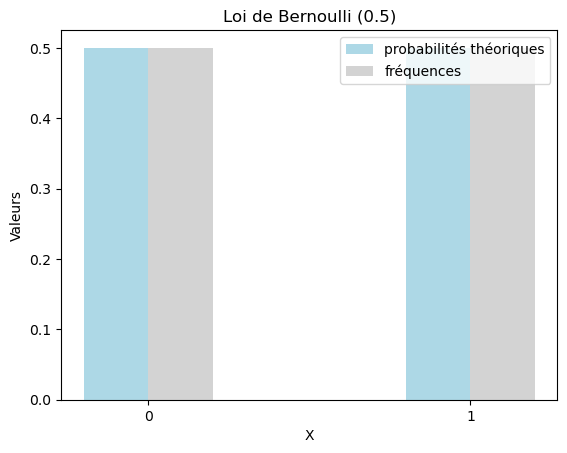

In [10]:
import matplotlib.pyplot as mpl

# Paramètres
p = 1/2      # Probabilité de succès
simulations = 100_000 # Nombre de simulations


# création d'une liste contenant plusieurs essais de Bernoulli
liste = []
for _ in range(simulations):
    liste.append(Bernoulli(p))
    
X = np.arange(2) # les abscisses 0 et 1

P = [p, 1-p]   # probabilités théoriques

f1 = liste.count(1) / simulations  # fréquence des succès : nombre des 1 sur le nombre des simulations
f0 = liste.count(0) / simulations # fréquence des échecs
F = [f0, f1]

# représentation graphique

mpl.bar(X-0.1, P, width=0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("X")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi de Bernoulli ({p})") 
mpl.legend() 
mpl.show() 

### Simulation de la loi binomiale

La loi binomiale décrit le nombre de succès dans une série de $n$ expériences de Bernoulli indépendantes Si $X_1, X_2, \dots, X_n$ sont $n$ variables aléatoires indépendantes suivant chacune une loi de Bernoulli de paramètre $p$, alors la somme 
$$S_n = \sum_{i=1}^n X_i$$
suit une loi binomiale de paramètres $n$ et $p$, notée
$$S_n \sim \mathcal{B}(n, p)$$

La fonction de masse de probabilité de la loi binomiale est donnée par :
$$P(S_n = x) = \binom{n}{x} p^x (1-p)^{n-x}, \quad x = 0, 1, \dots, n.$$
Où $\binom{n}{x} = \frac{n!}{x!(n-x)!}$ est le coefficient binomial.

Dans ce cas on trouve que l'espérance vaut $np$.


#### Exemple

Supposons maintenant qu'un dé soit lancé 10 fois. Le nombre total des nombres impairs obtenus après 10 lancers suit une loi binomiale : $$S_{10} \sim \mathcal{B}(10, {\textstyle\frac{1}{2}})$$

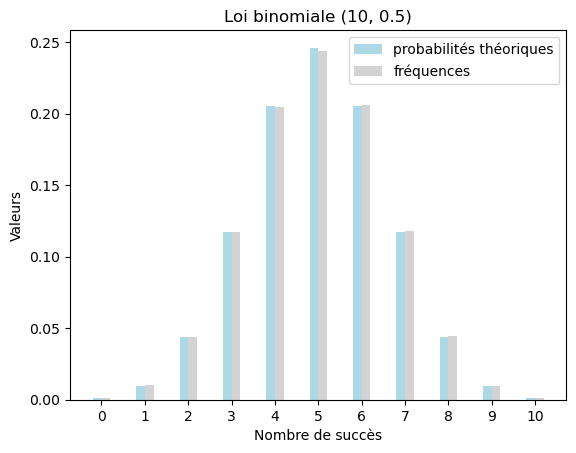

Espérance simulée : 5.00062
Espérance théorique : 5.0


In [11]:
import math

# Paramètres
n = 10       # Nombre d'essais de Bernoulli
p = 1/2      # Probabilité de succès
simulations = 100_000 # Nombre de simulations


# Liste des résultats des simulations
liste = []
for _ in range(simulations):
    x = sum(Bernoulli(p) for _ in range(n))  # Somme de n essais de Bernoulli
    liste.append(x)

# Liste des fréquences des succès
F = []
for i in range(n+1):
    F.append(liste.count(i)/simulations)

# Fonction qui calcule la probabilité théorique où math.comb calcule le coefficient binomial
def PBinomiale(x, n, p):
    return math.comb(n, x)*(p**x)*((1-p)**(n-x)) 

# Liste des probabilités théoriques de chaque nombre de succès possible
P = [PBinomiale(i, n, p) for i in range(n+1)]

# Liste des abscisses (nombres de succès possibles)
X = np.arange(n+1)


# Représentation graphique 
mpl.bar(X-0.1, P, 0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("Nombre de succès")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi binomiale ({n}, {p})")
mpl.legend() 
mpl.show()     
    
    
# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {sum(liste)/simulations}")
print(f"Espérance théorique : {n*p}")


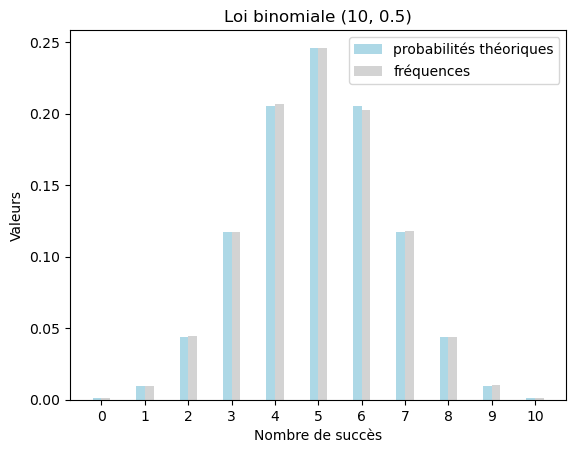

Espérance simulée : 4.99581
Espérance théorique : 5.0


In [12]:
# Paramètres
n = 10       # Nombre d'essais de Bernoulli
p = 1/2      # Probabilité de succès
simulations = 100_000 # Nombre de simulations


# Liste des résultats des simulations
liste = []
for _ in range(simulations):
    u = np.random.random()
    x = 0
    s = PBinomiale(x, n, p)
    while s<u:
        x += 1
        s += PBinomiale(x, n, p)
    liste.append(x)

# Liste des fréquences des succès
F = []
for i in range(n+1):
    F.append(liste.count(i)/simulations)


# Liste des probabilités théoriques de chaque nombre de succès possible
P = [PBinomiale(i, n, p) for i in range(n+1)]

# Liste des abscisses (nombres de succès possibles)
X = np.arange(n+1)


# Représentation graphique 
mpl.bar(X-0.1, P, 0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("Nombre de succès")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi binomiale ({n}, {p})")
mpl.legend() 
mpl.show()     
    
    
# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {sum(liste)/simulations}")
print(f"Espérance théorique : {n*p}")

### Simulation de la loi géométrique

La loi géométrique est une loi de probabilité discrète qui mesure le nombre d'essais nécessaires pour obtenir un succès dans une séquence d'essais de Bernoulli indépendants de paramètre $p$.

Une variable aléatoire $X$ suit une loi géométrique, $X\sim\mathcal{G}(p)$,  si elle prend des valeurs dans {1, 2, 3, ...} avec la probabilité :

$$P(X = n) = p(1-p)^{n-1}$$

D'où l'espérance vaut $\frac{1}{p}$

Selon la méthode d’inversion expliquée ci-dessus, on renverra la valeur 1 si $u=random()$ appartient à l’intervalle 
$I_0=[0, p]$, et la valeur $x$ si $u$ appartient à l’intervalle $I_x=[\sum_{i=0}^{x-1}p(1-p)^{i}, \sum_{i=0}^{x}p(1-p)^{i}]$.

#### Exemple

Supposons qu'un dé soit lancé 10 fois. Le nombre des lancers avant d'obtenir un nombre impair (succès) suit une loi géométrique : $$X \sim \mathcal{G}({\textstyle\frac{1}{2}})$$

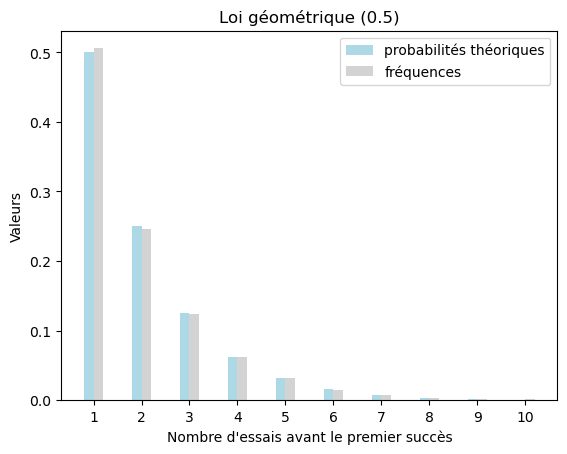

Espérance simulée : 1.99032
Espérance théorique : 2.0


In [14]:
# Paramètres
n = 10       # Nombre d'essais
p = 1/2      # Probabilité de succès
simulations = 100_000 # Nombre de simulations


# Liste des résultats des simulations
liste = []
for _ in range(simulations):
    u = np.random.random()
    x = 1
    s = p
    while s<u:
        s += p*(1-p)**x
        x += 1  
    liste.append(x)

# Liste des fréquences de chaque nombre d'essais avant le succès
F = []
for i in range(1, n+1):
    F.append(liste.count(i)/simulations)

# Liste des probabilités théoriques de chaque nombre d'essais possible avant le succès
P = [p*(1-p)**i for i in range(n)]

# Liste des abscisses (nombres d'essais avant le succès)
X = np.arange(1, n+1)

# Représentation graphique 
mpl.bar(X-0.1, P, 0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("Nombre d'essais avant le premier succès")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi géométrique ({p})")
mpl.legend() 
mpl.show()     
    
    
# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {sum(liste)/simulations}")
print(f"Espérance théorique : {1/p}")

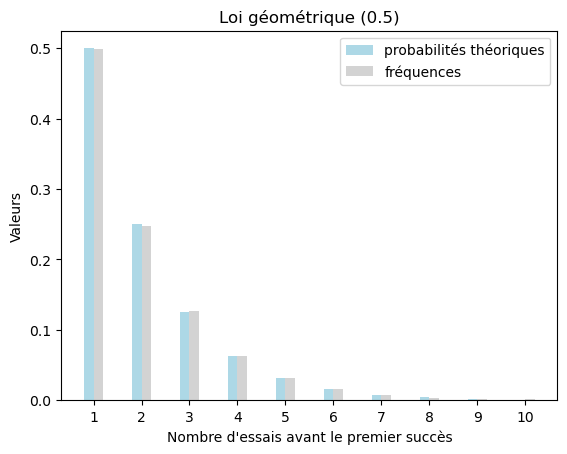

Espérance simulée : 1.99549
Espérance théorique : 2.0


In [13]:
# Paramètres
n = 10       # Nombre d'essais
p = 1/2      # Probabilité de succès
simulations = 100_000 # Nombre de simulations


# Liste des résultats des simulations
liste = []
for _ in range(simulations):
    c = 1 # compteur du nombre d'essais avant le premier succès pour chaque simulation
    while Bernoulli(p)>p and c<=n:
        c += 1
    if c != n+1:
        liste.append(c)

# Liste des fréquences de chaque nombre d'essais avant le succès
F = []
for i in range(1, n+1):
    F.append(liste.count(i)/simulations)

# Liste des probabilités théoriques de chaque nombre d'essais possible avant le succès
P = [p*(1-p)**i for i in range(n)]

# Liste des abscisses (nombres d'essais avant le succès)
X = np.arange(1, n+1)

# Représentation graphique 
mpl.bar(X-0.1, P, 0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("Nombre d'essais avant le premier succès")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi géométrique ({p})")
mpl.legend() 
mpl.show()     
    
    
# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {sum(liste)/simulations}")
print(f"Espérance théorique : {1/p}")

### Simulation de la loi de Poisson

La loi de Poisson est une loi de probabilité discrète utilisée pour modéliser le nombre d’événements qui se produisent dans un intervalle de temps ou d’espace, lorsque ces événements sont indépendants et se produisent à un taux constant.

Une variable aléatoire $X$ suit une loi de Poisson de paramètre $\lambda$ (le taux moyen d'événements), $X\sim\mathcal{P}(\lambda)$, si elle prend des valeurs dans {1, 2, 3, ...} avec la probabilité :

$$P(X = n) = \frac{\lambda^{n}e^{-\lambda}}{n!}$$

Selon la méthode d’inversion expliquée ci-dessus, on renverra la valeur 0 si $u=random()$ appartient à l’intervalle 
$I_0=[0, \frac{\lambda^0e^{−\lambda}}{0!}]$, et la valeur $x$ si $u$ appartient à l’intervalle $I_x=[\sum_{i=0}^{x-1}\frac{\lambda^ie^{−\lambda}}{i!}, \sum_{i=0}^{x}\frac{\lambda^ie^{−\lambda}}{i!}]$.

#### Exemple

Un être humain mange 3 fois par jour. Quelle est la probabilité de manger 0, 1, 2, ..., 10 fois par jour?

On cherche à l’aide d’une boucle while l’intervalle $I_x$ contenant $u$ et on ajoute $x$ à la liste. Notons que les variables $t$ et $s$ contiennent respectivement $\frac{\lambda^x}{x!}$ et $\sum_{i=0}^{x}\frac{\lambda^ie^{−\lambda}}{i!}$ à chaque nouveau passage dans la boucle.

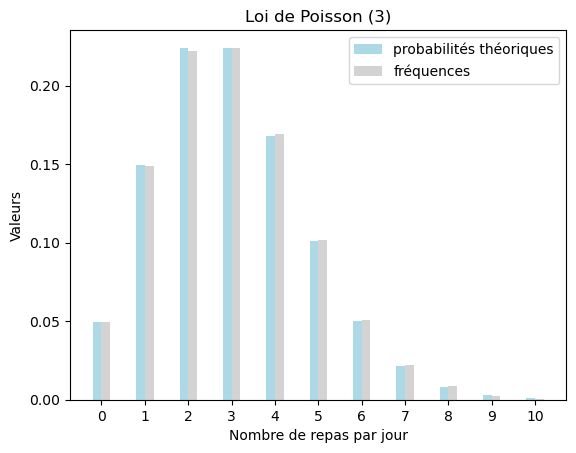

Espérance simulée : 3.00793
Espérance théorique : 3


In [15]:
# Paramètres
n = 10      
Lambda = 3    
simulations = 100_000


# Liste des résultats des simulations
liste = []
for _ in range(simulations):
    x = 0 # compteur
    t = math.exp(-Lambda) #variable temporaire pour réduire le nombre des calculs 
    s = t #somme
    u = np.random.random()
    while s<u:
        x += 1
        t *= (Lambda/x)
        s += t
    liste.append(x)

# Liste des fréquences de chaque nombre d'événements
F = []
for i in range(n+1):
    F.append(liste.count(i)/simulations)

# Liste des probabilités théoriques de chaque nombre d'événements
P = [Lambda**i*math.exp(-Lambda)/math.factorial(i) for i in range(n+1)]

# Liste des abscisses (nombres d'événements)
X = np.arange(n+1)

# Représentation graphique 
mpl.bar(X-0.1, P, 0.2, color='lightblue', label = 'probabilités théoriques') 
mpl.bar(X+0.1, F, 0.2, color='lightgray', label = 'fréquences')

mpl.xlabel("Nombre de repas par jour")
mpl.xticks(X)
mpl.ylabel("Valeurs") 
mpl.title(f"Loi de Poisson ({Lambda})")
mpl.legend() 
mpl.show()     
    
    
# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {sum(liste)/simulations}")
print(f"Espérance théorique : {Lambda}")

## En utilisant les fonctions de la bibliothèque numpy.random

### Simulation de la loi de Bernoulli et de la loi binomiale

Pour simuler une variable aléatoire suivant une loi binomiale, on peut utiliser directement la fonction $numpy.random.binomial$.

#### Syntaxe

$numpy.random.binomial(nombre, probabilit\acute{e}, taille)$

- $nombre$ : nombre d'essais (ou tirages de Bernoulli).
- $probabilit\acute{e}$ : probabilité de succès lors d'un essai.
- $taille$ : nombre de simulations (combien de variables aléatoires on veut générer).

*Remarque* : On peut simuler la loi de Bernoulli en donnant la valeur 1 comme nombre d'essais. 

La fonction retourne une liste contenant le nombre de succès obtenus pour chaque simulation.

Pour représenter graphiquement les résultats on utilise directement la fonction $matplotlib.pyplot.hist$ où les histogrammes se construisent à partir de la liste des valeurs renvoyée par la fonction $binomial$.

#### Exemple : $X \sim \mathcal{B}({\textstyle\frac{1}{2}})$

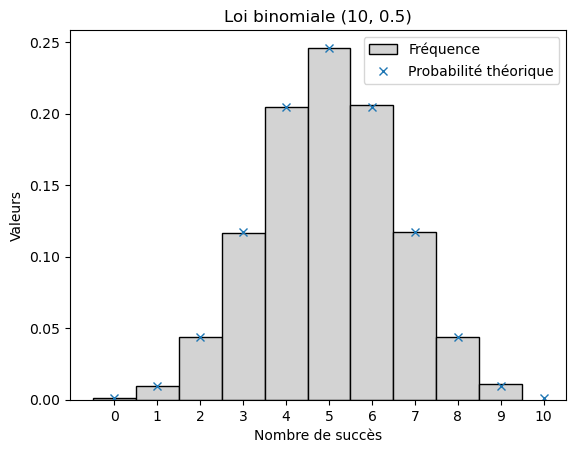

Espérance simulée : 5.00155
Espérance théorique : 5.0


In [16]:
# Paramètres
n=10
p=1/2
simulations=100_000

# Simulation
Liste = np.random.binomial(n, p, simulations)

# Probabilités théoriques
P = [PBinomiale(i, n, p) for i in range(n+1)]

# Abscisses 
X = np.arange(11)

# Représentation graphique des fréquences
mpl.hist(Liste, X, edgecolor='black', color='lightgray', density=True, label='Fréquence', align='left')

# Représentation graphique des probabilités théoriques
mpl.plot(X, P, 'x', label='Probabilité théorique')

mpl.title(f"Loi binomiale ({n}, {p})")
mpl.xticks(np.arange(11))
mpl.xlabel("Nombre de succès")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {n*p}")

### Simulation de la loi géométrique 

Pour simuler une variable aléatoire suivant une loi géométrique, on utilise la fonction $numpy.random.geometric$.

#### Syntaxe

$numpy.random.geometric(probabilit\acute{e}, taille)$

- $probabilit\acute{e}$ : probabilité de succès lors d'un essai.
- $taille$ : nombre de simulations.

La fonction retourne une liste contenant le nombre d'essais nécessaires pour obtenir le premier succès pour chaque simulation.

#### Exemple : $S_{10} \sim \mathcal{B}(10, {\textstyle\frac{1}{2}})$

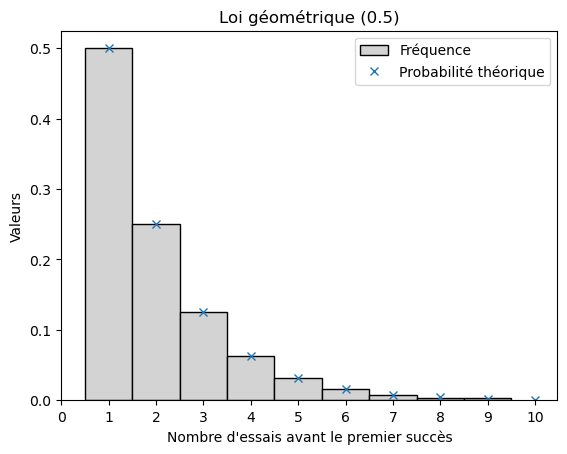

Espérance simulée : 2.00111
Espérance théorique : 2.0


In [17]:
# Paramètres
n=10
p=1/2
simulations=100_000

# Simulation
Liste = np.random.geometric(p, simulations)

# Probabilités théoriques
P = [p*(1-p)**i for i in range(n)]

# Abscisses
X = np.arange(1, n+1)

# Représentation graphique
mpl.hist(Liste, X, edgecolor='black', color='lightgray', density=True, label='Fréquence', align='left')

mpl.plot(X, P, 'x', label='Probabilité théorique')
mpl.title(f"Loi géométrique ({p})")
mpl.xticks(np.arange(11))
mpl.xlabel("Nombre d'essais avant le premier succès")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {1/p}")

### Simulation de la loi de Poisson

Pour simuler une variable aléatoire suivant une loi de Poisson, on utilise la fonction $numpy.random.poisson$.

#### Syntaxe 

$numpy.random.poisson(lambda, taille)$

- $lambda$ : paramètre $\lambda>0$.
- $taille$ : nombre de simulations.

La fonction retourne une liste contenant le nombre d'événements observés pour chaque simulation.

#### Exemple : $X\sim\mathcal{P}(3)$

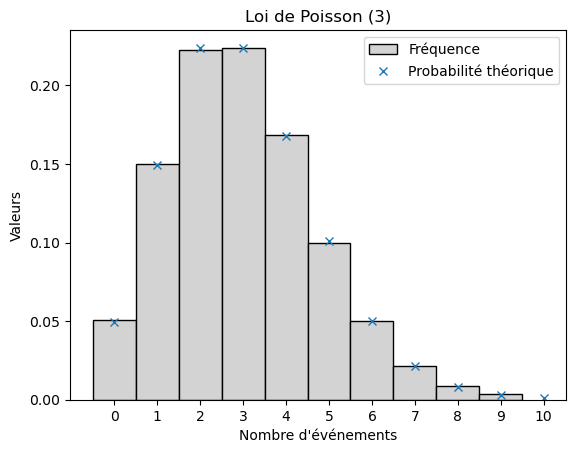

Espérance simulée : 2.99834
Espérance théorique : 3


In [19]:
# Paramètres
n=10
Lambda=3
simulations=100_000

# Simulation
Liste = np.random.poisson(Lambda, simulations)

# Probabilités théoriques
P = [(Lambda**i * math.exp(-Lambda)) / math.factorial(i) for i in range(n+1)]

# Abscisses
X = np.arange(n+1)

# Représentation graphique
mpl.hist(Liste, X, edgecolor='black', color='lightgray', density=True, label='Fréquence', align='left')

mpl.plot(X, P, 'x', label='Probabilité théorique')
mpl.title(f"Loi de Poisson ({Lambda})")
mpl.xticks(np.arange(11))
mpl.xlabel("Nombre d'événements")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

# Comparaison entre l'espérance théorique et espérance simulée  
 
print(f"Espérance simulée : {np.mean(Liste)}")
print(f"Espérance théorique : {Lambda}")

# Simulation de variables aléatoires à densité  

## En utilisant la méthode d’inversion de la fonction de répartition

### Principe

On suppose que $X$ est une variable aléatoire à densité de densité $f$. Alors la fonction de répartition $$F(x)=P(X\leq x)$$ réalise une bijection de $X(\Omega) \subseteq \rm I\!R$ sur $]0, 1[$.

Cela veut dire que si $U$ suit une loi uniforme sur $]0,1[$ alors $F^{−1}(U)$ suit la même loi que $X$.

Pour simuler la variable $X$, on procèdera comme suit :
- on part d'une variable $u$ de manière uniforme dans $]0,1[$ à l’aide de la fonction $random()$ ;
- on retourne $F^{−1}(u)$.

### Loi exponentielle

La loi exponentielle est une loi de probabilité utilisée pour modéliser des phénomènes aléatoires associés à des durées, comme le temps d’attente entre deux événements successifs dans un processus aléatoire.

Une variable aléatoire $X$ suit une loi exponentielle de paramètre $\lambda$, $X\sim\mathcal{E}(\lambda)$, si sa densité de probabilité est donnée par :

$$f(x)=\lambda e^{-\lambda x},\> x\in \rm I\!R_+^*$$
         
$\lambda>0$ est appelé le taux ou intensité d'occurrence (plus $\lambda$ est grand, plus les durées sont courtes).

La fonction de répartition $F(x)$ est définie comme la probabilité que la variable aléatoire $X$  soit inférieure ou égale à $x$. Elle est calculée en intégrant la densité de probabilité $f(x)$ de 0 à $x$ :

$$F(x)=P(X\leq x)=\int_{0}^{x}f(t)dt=1-e^{-\lambda x},\> x\in \rm I\!R_+^*$$

Alors $$F^{-1}(x)=-\frac{1}{\lambda}ln(1-x), x \in ]0, 1[$$

Ainsi, on peut simuler la loi exponnentielle de paramètre $\lambda$ avec la fonction suivante :

In [20]:
Lambda=1/2

def exponentielle(Lambda):
    u = np.random.random()
    x = -(1/Lambda)*np.log(1-u)
    return x

In [21]:
simulations = 100_000
# Création d'une liste contenant plusieurs simulations
Liste=[]
for _ in range(simulations):
    Liste.append(exponentielle(Lambda))

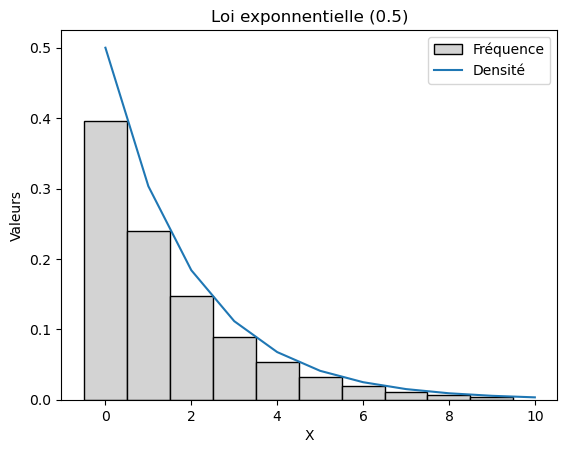

In [22]:
# Abscisses 
X = np.arange(11)
# Représentation graphique des fréquences
mpl.hist(Liste, X, edgecolor='black', color='lightgray', density=True, label='Fréquence', align='left')

# Représentation graphique de la densité
mpl.plot(X, Lambda*np.exp(-Lambda*X), label='Densité')

mpl.title(f"Loi exponnentielle ({Lambda})")
mpl.xlabel("X")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()

On observe graphiquement que les aires des rectangles formant l’histogramme des fréquences sont proches des aires délimitées par la courbe représentative de la densité. On peut donc conclure que 
$exponentielle(\lambda)$ renvoie bien des simulations suivant cette loi.

### Loi de Cauchy standard

Une variable $X$ suit une loi de Cauchy standard avec une densité $$f(x)=\frac{1}{\pi(1+x^2)},\> x \in \rm I\!R$$

et une fonction de répartition $$F(x)=\int_{-\infty}^{x}f(t)dt=\frac{1}{\pi}arctan(x)+\frac{1}{2},\> x \in \rm I\!R$$

dont $$F^{-1}(u)=tan(\pi(u -\frac{1}{2})),\> u \in ]0, 1[$$

Ainsi, on peut simuler la loi de Cauchy avec la fonction suivante :

In [23]:
def cauchy():
    u = np.random.random()
    x = np.tan(np.pi*(u-1/2))
    return x

In [24]:
# Création d'une liste contenant plusieurs simulations
Liste=[]
for _ in range(simulations):
    Liste.append(cauchy())

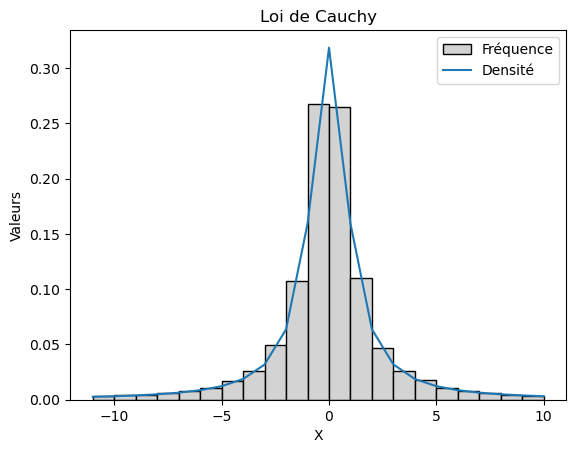

In [25]:
# Abscisses 
X = np.arange(-11,11)
# Représentation graphique des fréquences
mpl.hist(Liste, X, edgecolor='black', color='lightgray', density=True, label='Fréquence', align='mid')

# Représentation graphique de la densité
mpl.plot(X, 1/(np.pi*(1+X**2)), label='Densité')

mpl.title(f"Loi de Cauchy")
mpl.xlabel("X")
mpl.ylabel("Valeurs")
mpl.legend()
mpl.show()